# Downloading data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tickers = ["SAF.PA", "ATO.PA", "MC.PA", "AIR.PA", "RNO.PA", "HO.PA", "ENGI.PA", "CS.PA", "ENR.DE", "TOT", "CA.PA", "SU.PA", "BN.PA", "SIEGY", "AI.PA", "ML.PA", "AM.PA", "ORA.PA", "^FCHI"]
period = "2y"

In [3]:
ohlc = yf.download(tickers, period=period)
prices = ohlc["Adj Close"]
prices["CAC40"] = prices["^FCHI"] / 101.6
del prices["^FCHI"]
prices.tail()

[*********************100%***********************]  19 of 19 completed


C:\Users\D580656\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,AI.PA,AIR.PA,AM.PA,ATO.PA,BN.PA,CA.PA,CS.PA,ENGI.PA,ENR.DE,HO.PA,MC.PA,ML.PA,ORA.PA,RNO.PA,SAF.PA,SIEGY,SU.PA,TOT,CAC40
Date,,,,,,,,,,,,,,,,,,,
2020-12-29,135.850006,93.070000,907.5,75.760002,54.540001,14.345,19.736000,12.755,29.900000,76.320000,512.799988,106.300003,9.826,36.255001,120.500000,71.760002,120.650002,42.512001,55.234154
2020-12-30,135.300003,91.250000,895.0,75.339996,54.240002,14.245,19.676001,12.695,30.000000,75.440002,513.099976,106.050003,9.804,35.945000,119.000000,71.779999,120.849998,42.669998,55.112305
2020-12-31,134.250000,89.779999,897.0,74.779999,53.759998,14.030,19.511999,12.520,NaN,74.900002,510.899994,104.949997,9.734,35.759998,115.949997,71.790001,118.300003,41.910000,54.639864
2021-01-04,136.449997,89.889999,886.0,76.120003,54.400002,14.490,19.438000,12.805,30.129999,75.180000,512.099976,106.750000,9.950,35.759998,116.150002,71.820000,121.750000,42.380001,55.009448
2021-01-05,134.850006,88.970001,899.0,75.839996,54.759998,14.925,19.320000,12.635,30.080000,76.199997,507.200012,104.800003,9.878,36.200001,115.699997,NaN,119.449997,NaN,54.636120


# Expected returns and risk models

In [4]:
import pypfopt
from pypfopt import risk_models, expected_returns
from pypfopt import plotting



In [5]:
mu = expected_returns.capm_return(prices)
S = risk_models.semicovariance(prices)

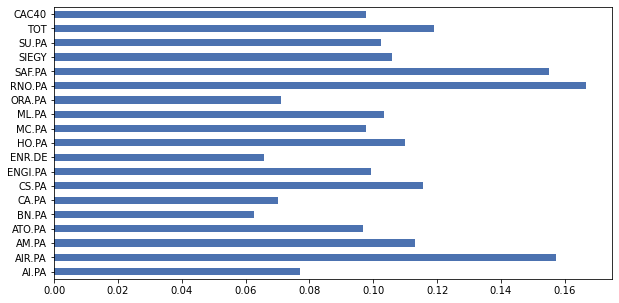

In [6]:
mu.plot.barh(figsize=(10,5));


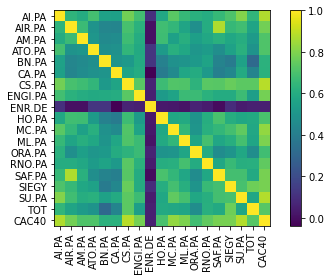

In [7]:
plotting.plot_covariance(S, plot_correlation=True);


# Min volatility with a transaction cost objective


In [8]:
#3 * prices.iloc[-2]["ATO.PA"] + \ #ATOS SE
#0*prices.iloc[-2]["MC.PA"] + \#LVMH
#6 * prices.iloc[-2]["AIR.PA"] + \ #AIRBUS
#6 * prices.iloc[-2]["RNO.PA"] +\ #RENAULT
#10* prices.iloc[-2]["HO.PA"] +\ #THALES
#20* prices.iloc[-2]["ENGI.PA"]+\ #ENGIE
#5 * prices.iloc[-2]["CS.PA"] +\ #AXA
#1 * prices.iloc[-2]["ENR.DE"]+\ #SIEMENS ENERGY
#4 * prices.iloc[-2]["TOT"]  + \#TOTAL SE
#25* prices.iloc[-2]["CA.PA"] +\ #CARREFOUR
#5 * prices.iloc[-2]["SU.PA"] +\ #SCHNEIDER ELECTRIC SE
#6 * prices.iloc[-2]["BN.PA"] +\ #DANONE
#3 * prices.iloc[-2]["SIEGY"] +\ #SIEMENS AG
#10* prices.iloc[-2]["AI.PA"] +\ #AIR LIQUIDE
#5 * prices.iloc[-2]["ML.PA"] +\ #MICHELIN
#1 * prices.iloc[-2]["AM.PA"] +\ #DASSAULT AVIATION
#25* prices.iloc[-2]["ORA.PA"] +\ #ORANGE
#20* prices.iloc[-2]["CAC40"] #CAC40

PEA = 3 * prices.iloc[-2]["ATO.PA"] + 0*prices.iloc[-2]["MC.PA"] + 6 * prices.iloc[-2]["AIR.PA"] + 6 * prices.iloc[-2]["RNO.PA"] + 10* prices.iloc[-2]["HO.PA"] + 20* prices.iloc[-2]["ENGI.PA"]+ 5 * prices.iloc[-2]["CS.PA"] + 1 * prices.iloc[-2]["ENR.DE"]+ 4 * prices.iloc[-2]["TOT"]  + 25* prices.iloc[-2]["CA.PA"] + 5 * prices.iloc[-2]["SU.PA"] + 6 * prices.iloc[-2]["BN.PA"] + 3 * prices.iloc[-2]["SIEGY"] + 10* prices.iloc[-2]["AI.PA"] + 5 * prices.iloc[-2]["ML.PA"] + 1 * prices.iloc[-2]["AM.PA"] + 25* prices.iloc[-2]["ORA.PA"] + 20* prices.iloc[-2]["CAC40"] 

In [9]:
# Pretend that you started with a default-weight allocation

PEG = 27916

initial_weights = {
    "SAF.PA" : PEG/(PEA+PEG), 
    "ATO.PA" : 3 * prices.iloc[-2]["ATO.PA"] / (PEA+PEG), 
    "MC.PA"  :  0*   prices.iloc[-2]["MC.PA"] / (PEA+PEG), 
    "AIR.PA" : 6 * prices.iloc[-2]["AIR.PA"] / (PEA+PEG), 
    "RNO.PA" : 6 * prices.iloc[-2]["RNO.PA"] / (PEA+PEG), 
    "HO.PA"  : 10* prices.iloc[-2]["HO.PA"] / (PEA+PEG), 
    "ENGI.PA": 20* prices.iloc[-2]["ENGI.PA"] / (PEA+PEG), 
    "CS.PA"  : 5 * prices.iloc[-2]["CS.PA"] / (PEA+PEG), 
    "ENR.DE" : 1 * prices.iloc[-2]["ENR.DE"] / (PEA+PEG), 
    "TOT"    : 4 * prices.iloc[-2]["TOT"] / (PEA+PEG), 
    "CA.PA"  : 25* prices.iloc[-2]["CA.PA"] / (PEA+PEG), 
    "SU.PA"  : 5 * prices.iloc[-2]["SU.PA"] / (PEA+PEG), 
    "BN.PA"  : 6 * prices.iloc[-2]["BN.PA"] / (PEA+PEG), 
    "SIEGY"  : 3 * prices.iloc[-2]["SIEGY"] / (PEA+PEG), 
    "AI.PA"  : 10* prices.iloc[-2]["AI.PA"] / (PEA+PEG), 
    "ML.PA"  : 5 * prices.iloc[-2]["ML.PA"] / (PEA+PEG), 
    "AM.PA"  : 1 * prices.iloc[-2]["AM.PA"] / (PEA+PEG), 
    "ORA.PA" : 25* prices.iloc[-2]["ORA.PA"] / (PEA+PEG), 
    "CAC40"  : 20* prices.iloc[-2]["CAC40"] / (PEA+PEG)
}

initial_weights = [x for k,x in initial_weights.items()]
initial_weights

[0.7787096401202643,
 0.006370043696598125,
 0.0,
 0.015044750481829183,
 0.005985095735133051,
 0.020971267725277545,
 0.007143843802395262,
 0.002711090014826391,
 0.0008404685772784219,
 0.004728716919336356,
 0.010104870421183316,
 0.01698092468201787,
 0.009104844306654031,
 0.006010201259040771,
 0.03806237570496376,
 0.01488881897170766,
 0.024714742124464614,
 0.0069388171395163645,
 0.030689488317513048]

In [10]:
from pypfopt import EfficientFrontier, objective_functions

ef = EfficientFrontier(mu, S)

# 1% broker commission
ef.add_objective(objective_functions.transaction_cost, w_prev=initial_weights, k=0.01)
ef.min_volatility()
weights = ef.clean_weights()
weights


OrderedDict([('AI.PA', 0.41886),
             ('AIR.PA', 0.0),
             ('AM.PA', 0.0),
             ('ATO.PA', 0.01504),
             ('BN.PA', 0.00599),
             ('CA.PA', 0.02097),
             ('CS.PA', 0.0),
             ('ENGI.PA', 0.00271),
             ('ENR.DE', 0.46482),
             ('HO.PA', 0.00473),
             ('MC.PA', 0.0101),
             ('ML.PA', 0.01698),
             ('ORA.PA', 0.0091),
             ('RNO.PA', 0.0),
             ('SAF.PA', 0.0),
             ('SIEGY', 0.0),
             ('SU.PA', 0.0),
             ('TOT', 0.0),
             ('CAC40', 0.03069)])

comparaison avec un cout de transaction à 0.1%

In [11]:

ef = EfficientFrontier(mu, S)
ef.add_objective(objective_functions.transaction_cost, w_prev=initial_weights, k=0.001)
ef.min_volatility()
weights = ef.clean_weights()
weights

OrderedDict([('AI.PA', 0.08985),
             ('AIR.PA', 0.0),
             ('AM.PA', 0.0),
             ('ATO.PA', 0.0),
             ('BN.PA', 0.00599),
             ('CA.PA', 0.08715),
             ('CS.PA', 0.0),
             ('ENGI.PA', 0.0),
             ('ENR.DE', 0.77541),
             ('HO.PA', 0.00473),
             ('MC.PA', 0.0101),
             ('ML.PA', 0.01698),
             ('ORA.PA', 0.00979),
             ('RNO.PA', 0.0),
             ('SAF.PA', 0.0),
             ('SIEGY', 0.0),
             ('SU.PA', 0.0),
             ('TOT', 0.0),
             ('CAC40', 0.0)])

ajout d'un régularisation L2 afin d'éviter que certains poids ne soient réduit à 0

In [12]:

ef = EfficientFrontier(mu, S)
ef.add_objective(objective_functions.transaction_cost, w_prev=initial_weights, k=0.001)
ef.add_objective(objective_functions.L2_reg)
ef.min_volatility()
weights = ef.clean_weights()
weights

OrderedDict([('AI.PA', 0.05889),
             ('AIR.PA', 0.0359),
             ('AM.PA', 0.05079),
             ('ATO.PA', 0.05511),
             ('BN.PA', 0.06268),
             ('CA.PA', 0.0611),
             ('CS.PA', 0.04857),
             ('ENGI.PA', 0.05185),
             ('ENR.DE', 0.0779),
             ('HO.PA', 0.05216),
             ('MC.PA', 0.05584),
             ('ML.PA', 0.05357),
             ('ORA.PA', 0.06079),
             ('RNO.PA', 0.03446),
             ('SAF.PA', 0.03801),
             ('SIEGY', 0.05071),
             ('SU.PA', 0.05245),
             ('TOT', 0.04606),
             ('CAC40', 0.05316)])

Pour réduire l'effet de la régularisation il est possible de réduire le gamma

In [13]:
ef = EfficientFrontier(mu, S)
ef.add_objective(objective_functions.transaction_cost, w_prev=initial_weights, k=0.01)
ef.add_objective(objective_functions.L2_reg, gamma=0.05)  # default is 1
ef.min_volatility()
weights = ef.clean_weights()
weights

OrderedDict([('AI.PA', 0.23339),
             ('AIR.PA', 0.00637),
             ('AM.PA', 0.00053),
             ('ATO.PA', 0.01593),
             ('BN.PA', 0.09562),
             ('CA.PA', 0.08689),
             ('CS.PA', 0.00714),
             ('ENGI.PA', 0.00271),
             ('ENR.DE', 0.29218),
             ('HO.PA', 0.01757),
             ('MC.PA', 0.03615),
             ('ML.PA', 0.01852),
             ('ORA.PA', 0.08224),
             ('RNO.PA', 0.0),
             ('SAF.PA', 0.02753),
             ('SIEGY', 0.01489),
             ('SU.PA', 0.02471),
             ('TOT', 0.00694),
             ('CAC40', 0.03069)])

In [14]:
ef.portfolio_performance(verbose=True);


Expected annual return: 7.8%
Annual volatility: 10.6%
Sharpe Ratio: 0.55


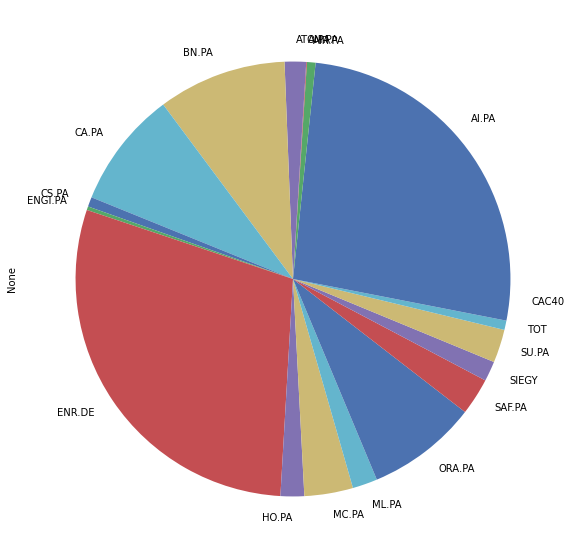

In [15]:
pd.Series(weights).plot.pie(figsize=(10,10));


# Custom convex objectives


In [16]:
import cvxpy as cp

# Note: functions are minimised. If you want to maximise an objective, stick a minus sign in it.
def logarithmic_barrier_objective(w, cov_matrix, k=0.1):
    log_sum = cp.sum(cp.log(w))
    var = cp.quad_form(w, cov_matrix)
    return var - k * log_sum

In [17]:
ef = EfficientFrontier(mu, S, weight_bounds=(0.01, 0.2))
ef.convex_objective(logarithmic_barrier_objective, cov_matrix=S, k=0.001)
weights = ef.clean_weights()
weights

OrderedDict([('AI.PA', 0.05899),
             ('AIR.PA', 0.02017),
             ('AM.PA', 0.03662),
             ('ATO.PA', 0.04582),
             ('BN.PA', 0.09292),
             ('CA.PA', 0.07905),
             ('CS.PA', 0.03211),
             ('ENGI.PA', 0.03727),
             ('ENR.DE', 0.2),
             ('HO.PA', 0.04042),
             ('MC.PA', 0.05097),
             ('ML.PA', 0.04264),
             ('ORA.PA', 0.07649),
             ('RNO.PA', 0.01858),
             ('SAF.PA', 0.02104),
             ('SIEGY', 0.03679),
             ('SU.PA', 0.0393),
             ('TOT', 0.02934),
             ('CAC40', 0.04149)])

In [18]:
ef.portfolio_performance(verbose=True);


Expected annual return: 8.9%
Annual volatility: 12.8%
Sharpe Ratio: 0.54


In [19]:
ef = EfficientFrontier(mu, S, weight_bounds=(0.01, 0.9))

#SAF_index = ef.tickers.index("SAF.PA")  # get the index of TOTAL
#ef.add_constraint(lambda w: w[SAF_index] >= 0.7787096401202643)

ef.convex_objective(logarithmic_barrier_objective, cov_matrix=S, k=0.001)
weights = ef.clean_weights()
weights

OrderedDict([('AI.PA', 0.04051),
             ('AIR.PA', 0.01971),
             ('AM.PA', 0.03068),
             ('ATO.PA', 0.03484),
             ('BN.PA', 0.05181),
             ('CA.PA', 0.05007),
             ('CS.PA', 0.02777),
             ('ENGI.PA', 0.03115),
             ('ENR.DE', 0.40185),
             ('HO.PA', 0.03227),
             ('MC.PA', 0.03767),
             ('ML.PA', 0.03403),
             ('ORA.PA', 0.04749),
             ('RNO.PA', 0.01863),
             ('SAF.PA', 0.02042),
             ('SIEGY', 0.02994),
             ('SU.PA', 0.03218),
             ('TOT', 0.0258),
             ('CAC40', 0.03318)])

In [20]:
ef.portfolio_performance(verbose=True);


Expected annual return: 8.6%
Annual volatility: 10.4%
Sharpe Ratio: 0.63


In [21]:
weights

OrderedDict([('AI.PA', 0.04051),
             ('AIR.PA', 0.01971),
             ('AM.PA', 0.03068),
             ('ATO.PA', 0.03484),
             ('BN.PA', 0.05181),
             ('CA.PA', 0.05007),
             ('CS.PA', 0.02777),
             ('ENGI.PA', 0.03115),
             ('ENR.DE', 0.40185),
             ('HO.PA', 0.03227),
             ('MC.PA', 0.03767),
             ('ML.PA', 0.03403),
             ('ORA.PA', 0.04749),
             ('RNO.PA', 0.01863),
             ('SAF.PA', 0.02042),
             ('SIEGY', 0.02994),
             ('SU.PA', 0.03218),
             ('TOT', 0.0258),
             ('CAC40', 0.03318)])

In [ ]:
from pypfopt import DiscreteAllocation

da = DiscreteAllocation(weights, prices.iloc[-2], total_portfolio_value=1200)
alloc, leftover = da.lp_portfolio()
print(f"Leftover: ${leftover:.2f}")
alloc

In [1]:
alloc

NameError: name 'alloc' is not defined